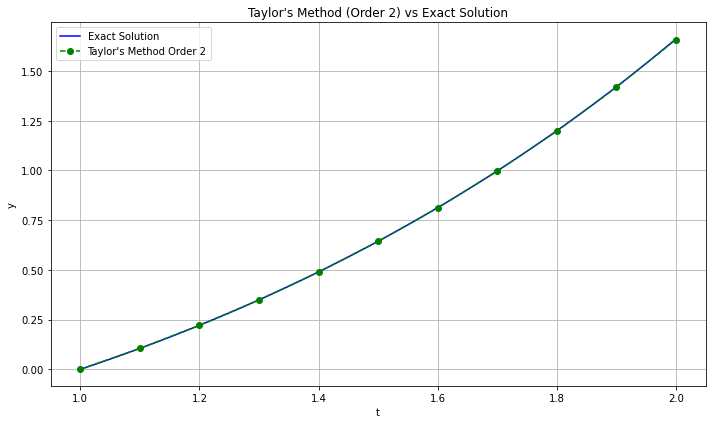

t = 1.0, Approx = 0.000000, Exact = 0.000000, Error = 0.000000
t = 1.1, Approx = 0.105000, Exact = 0.105160, Error = 0.000160
t = 1.2, Approx = 0.220919, Exact = 0.221243, Error = 0.000324
t = 1.3, Approx = 0.348612, Exact = 0.349121, Error = 0.000509
t = 1.4, Approx = 0.488954, Exact = 0.489682, Error = 0.000728
t = 1.5, Approx = 0.642883, Exact = 0.643875, Error = 0.000993
t = 1.6, Approx = 0.811438, Exact = 0.812753, Error = 0.001315
t = 1.7, Approx = 0.995787, Exact = 0.997494, Error = 0.001707
t = 1.8, Approx = 1.197252, Exact = 1.199439, Error = 0.002187
t = 1.9, Approx = 1.417344, Exact = 1.420116, Error = 0.002772
t = 2.0, Approx = 1.657795, Exact = 1.661282, Error = 0.003487


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定義微分方程 f(t, y)
def f(t, y):
    return 1 + (y / t) + (y / t)**2

# 定義 f'(t, y) 根據之前推導
def df(t, y):
    term1 = (-y / t**2) - (2 * y**2 / t**3)
    term2 = (1 / t) + (2 * y / t**2)
    return term1 + term2 * (1 + (y / t) + (y / t)**2)

# 解析解
def exact_solution(t):
    return t * np.tan(np.log(t))

# 初始條件與步長
t0, y0 = 1.0, 0.0
h = 0.1
N = int((2.0 - 1.0) / h)

# Taylor 方法近似解（order 2）
t_vals = [t0]
y_vals = [y0]

t = t0
y = y0

for i in range(N):
    y = y + h * f(t, y) + (h**2 / 2) * df(t, y)
    t = t + h
    t_vals.append(t)
    y_vals.append(y)

# 計算解析解與誤差
t_exact = np.linspace(1, 2, 100)
y_exact = exact_solution(t_exact)

# 計算誤差列表
exact_at_t_vals = exact_solution(np.array(t_vals))
errors = np.abs(np.array(y_vals) - exact_at_t_vals)

# 輸出誤差表格
error_table = list(zip(t_vals, y_vals, exact_at_t_vals, errors))

# 繪製圖形
plt.figure(figsize=(10, 6))
plt.plot(t_exact, y_exact, label='Exact Solution', color='blue')
plt.plot(t_vals, y_vals, 'o--', label="Taylor's Method Order 2", color='green')
plt.title("Taylor's Method (Order 2) vs Exact Solution")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 顯示誤差表格
for t_val, approx_y, exact_y, err in error_table:
    print(f"t = {t_val:.1f}, Approx = {approx_y:.6f}, Exact = {exact_y:.6f}, Error = {err:.6f}")
